### Load packages 

In [2]:

import os
import glob

project_dir = "/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/"
#project_dir = "/standard/vol328/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/20250707_9samples_cellstate/"
#project_dir ="/Users/zqn7td/Desktop/9samples_cellstate/"

os.chdir("/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts")

In [3]:
##Import packages


import anndata as ad
import scimap as sm
import importlib

import scanpy as sp
import pandas as pd
import numpy as np
import napari as napari
import math
import seaborn as sns
import itertools

from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import colors

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster, leaves_list
from scipy.spatial.distance import pdist
from matplotlib.colors import Normalize

import hetmel as hm

Running SCIMAP  2.2.11


/Users/zqn7td/anaconda3/envs/scimap/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [15]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

<module 'hetmel' from '/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py'>

In [22]:
#Marker subsets
AP1s = ['cFOS', 'FRA1','FRA2','cJUN','JUNB','JUND']
Diff_state_markers = ['MITF','SOX10','PRAME','SOX9','NGFR','AXL']

### Read in adata

In [4]:
adata= ad.read_h5ad(os.path.join(project_dir, 'combined_tumor_adata_v1.h5ad'))
adata

AnnData object with n_obs × n_vars = 838311 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'TissueID', 'ROI', 'phenotype', 'phenotype_category'
    uns: 'all_markers'
    layers: 'log', 'log1p_raw', 'log_background_normalized', 'log_background_normalized_zeroed'

In [29]:
adata_balanced_subset = hm.threshold_phenotype_by_prevalence(adata_balanced, threshold=0.001, verbose=True, return_adata=True)

                                      count
phenotype                                  
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-  23509
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-  13611
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-   6743
MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-   5508
MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-   5502
MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-   3797
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-   3385
MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-   3347
MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-   3194
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-   3083
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-   2927
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-   2784
MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-   2212
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-   1347
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-   1261
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-   1228
MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+    806
MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+    768
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-    759
MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-    728
MITF+ SOX10- PRAME+ NGFR+ SOX9+ 

In [ ]:
adata_subset = hm.threshold_phenotype_by_prevalence(adata_bal, threshold=0.001, verbose=True, return_adata=True)

                                       count
phenotype                                   
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-  250515
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-  158582
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-   66519
MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-   37728
MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-   37343
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-   36755
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-   24586
MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-   21501
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-   21145
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-   20514
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-   19748
MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-   17993
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-   13875
MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-   13065
MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-   12815
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-    8643
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-    6938
MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-    6274
MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-    4961
MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-    4686
MITF+ SOX1

In [26]:
# Assuming `adata` is your AnnData object
# and `TissueID` is in adata.obs

# Find counts per TissueID
counts = adata.obs['TissueID'].value_counts()
min_count = counts.min()  # or set to a fixed number, e.g. 1000

# For each TissueID, randomly sample min_count cells
sampled_indices = []

for tissue in counts.index:
    tissue_cells = adata.obs[adata.obs['TissueID'] == tissue].index
    if len(tissue_cells) > min_count:
        sampled = np.random.choice(tissue_cells, size=min_count, replace=False)
    else:
        sampled = tissue_cells  # keep all if already <= min_count
    sampled_indices.extend(sampled)

# Subset adata to sampled cells
adata_balanced = adata[sampled_indices].copy()

In [27]:
adata_balanced.obs['phenotype'].value_counts()

phenotype
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-    23509
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-    13611
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-     6743
MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-     5508
MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-     5502
MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-     3797
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-     3385
MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-     3347
MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-     3194
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-     3083
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-     2927
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-     2784
MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-     2212
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-     1347
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-     1261
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-     1228
MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+      806
MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+      768
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-      759
MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-      728
MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-      691
MITF- SOX10- PRAME+ NGFR

In [28]:
adata_balanced.layers["zscore"] = stats.zscore(adata_balanced.layers["log_background_normalized_zeroed"], axis = 0)

In [ ]:
os.chdir('/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts')
importlib.reload(hm)

[[1 2 3 4 0 6]
 [1 2 0 4 0 6]
 [1 0 0 0 0 0]
 [1 2 3 0 0 0]
 [1 2 0 0 0 0]
 [0 2 3 4 0 0]
 [0 2 3 0 0 0]
 [0 2 0 0 0 0]
 [1 2 3 4 5 0]
 [1 2 3 4 0 0]
 [1 2 0 4 5 0]
 [1 2 0 4 0 0]
 [0 2 0 4 0 0]
 [1 0 0 4 0 6]
 [1 0 0 0 0 6]
 [0 0 3 0 5 6]
 [0 0 3 0 0 6]
 [1 0 0 4 5 6]
 [1 0 0 0 5 6]
 [1 0 3 0 0 0]
 [0 0 3 0 0 0]
 [1 0 3 4 0 0]
 [0 0 3 4 0 0]
 [1 0 0 0 5 0]
 [1 2 0 0 5 0]
 [0 2 0 0 5 0]
 [1 0 3 0 5 0]
 [0 0 3 0 5 0]
 [1 2 3 0 5 0]
 [0 2 3 0 5 0]
 [1 0 0 4 5 0]
 [1 0 0 4 0 0]
 [1 0 3 4 5 0]
 [0 0 3 4 5 0]
 [1 2 0 4 5 6]
 [0 2 0 4 5 6]
 [1 2 3 4 5 6]
 [0 2 3 4 5 0]
 [0 2 3 4 5 6]
 [0 2 0 4 5 0]]
['MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+'
 'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+'
 'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-'
 'MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-'
 'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-'
 'MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-'
 'MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-'
 'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-'
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-'
 'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-'

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1619: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



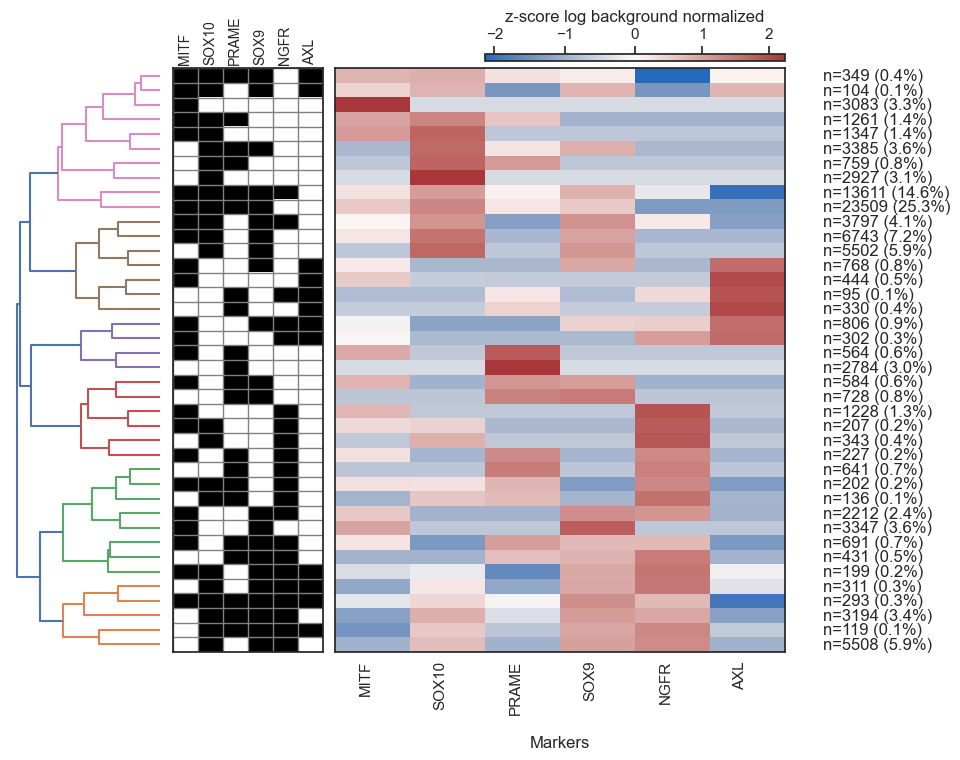

In [30]:
phenotype_cross_cluster = hm.heatmapnew(
    adata_balanced_subset,
    groupBy='phenotype',
    layer='log_background_normalized_zeroed',
    subsetMarkers=Diff_state_markers,
    
    clusterRows=True,
    clusterColumns=False,
    standardScale='column',
    showPrevalence=True,
    cmap='vlag',
    figsize=(10,10),
    dend_threshold=3.8,
    dend_axis = False,
    y_lab='Categories',
    row_dendrogram=True,
    scale_title="z-score log background normalized",
    phenotype_matrix=True,
    phenotype_labels=Diff_state_markers,
    clustering_method='complete',
    verbose=True,
    return_row_linkage=True,
   
)

[[1 0 3 4 5 6]
 [0 0 3 4 0 6]
 [1 0 3 4 0 6]
 [1 0 0 4 0 6]
 [1 0 3 0 0 6]
 [0 0 3 0 0 6]
 [1 0 3 0 5 6]
 [0 2 3 0 5 6]
 [0 0 3 0 5 6]
 [1 0 0 4 5 6]
 [0 0 3 4 5 6]
 [1 0 0 0 5 6]
 [0 2 0 0 5 6]
 [0 2 3 4 0 6]
 [0 2 0 4 0 6]
 [0 2 3 0 0 6]
 [0 2 0 0 0 6]
 [1 2 3 4 0 6]
 [1 2 0 4 0 6]
 [1 0 0 0 0 0]
 [1 2 0 0 0 6]
 [1 0 0 0 0 6]
 [1 2 3 4 5 0]
 [1 2 3 4 0 0]
 [0 2 3 4 0 0]
 [1 2 0 4 0 0]
 [0 2 0 4 0 0]
 [1 2 3 0 0 0]
 [1 2 0 0 0 0]
 [0 2 3 0 0 0]
 [0 2 0 0 0 0]
 [1 0 3 0 0 0]
 [0 0 3 0 0 0]
 [1 0 3 4 5 0]
 [0 0 3 4 5 0]
 [1 0 0 4 0 0]
 [1 0 3 4 0 0]
 [0 0 3 4 0 0]
 [1 2 0 4 5 6]
 [1 0 0 4 5 0]
 [0 2 3 4 5 0]
 [0 2 0 4 5 6]
 [0 2 3 4 5 6]
 [0 2 0 4 5 0]
 [1 2 3 4 5 6]
 [1 2 0 4 5 0]
 [1 0 0 0 5 0]
 [1 2 0 0 5 0]
 [0 2 0 0 5 0]
 [1 0 3 0 5 0]
 [0 0 3 0 5 0]
 [0 2 3 0 5 0]
 [1 2 3 0 5 6]
 [1 2 3 0 5 0]]
['MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL+'
 'MITF- SOX10- PRAME+ NGFR- SOX9+ AXL+'
 'MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL+'
 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+'
 'MITF+ SOX10- PRAME+ NGFR- S

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1619: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



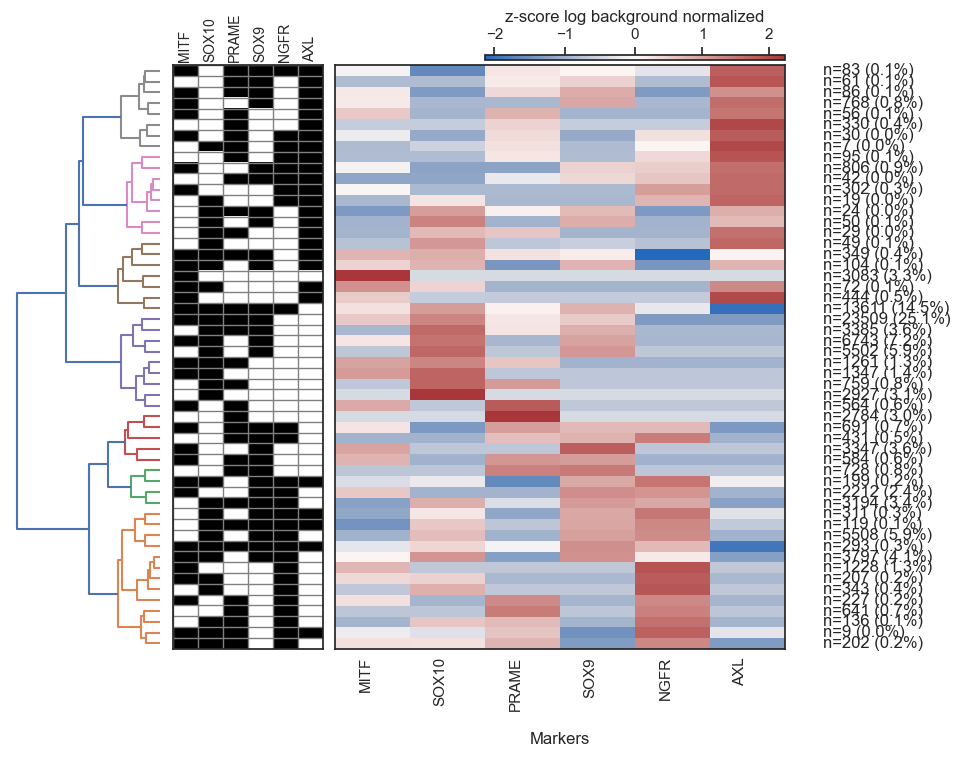

In [32]:
phenotype_cross_cluster = hm.heatmapnew(
    adata_balanced,
    groupBy='phenotype',
    layer='log_background_normalized_zeroed',
    subsetMarkers=Diff_state_markers,
    
    clusterRows=True,
    clusterColumns=False,
    standardScale='column',
    showPrevalence=True,
    cmap='vlag',
    figsize=(10,10),
    dend_threshold=4.1,
    dend_axis = False,
    y_lab='Categories',
    row_dendrogram=True,
    scale_title="z-score log background normalized",
    phenotype_matrix=True,
    phenotype_labels=Diff_state_markers,
    clustering_method='ward',
    verbose=True,
    return_row_linkage=True,
   
)

In [ ]:
adata.layers

In [83]:
phenotype_cross_cluster

{'MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-': 1,
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-': 1,
 'MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-': 1,
 'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-': 1,
 'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-': 1,
 'MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-': 1,
 'MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-': 1,
 'MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-': 1,
 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-': 1,
 'MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-': 1,
 'MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-': 1,
 'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-': 1,
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+': 1,
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-': 1,
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-': 1,
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+': 2,
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+': 2,
 'MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-': 2,
 'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+': 2,
 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-': 2,
 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-': 2,
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-': 2,
 'MITF+ SOX10- PRAME- NGFR- SOX9

In [209]:
def assign_clusters(adata,map,obs_key='phenotype_cluster'):
    """
    Assigns clusters to the AnnData object based on a mapping.
    
    Parameters:
    adata (AnnData): The AnnData object containing the data.
    map (dict): A dictionary mapping cluster names to cluster IDs.
    
    Returns:
    None: The function modifies the adata.obs directly.
    """
    adata.obs[obs_key] = adata.obs['phenotype'].map(map)
    adata.obs[obs_key] = adata.obs[obs_key].astype('category')
    
    

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_5847/1269664242.py:1: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



In [77]:
adata_balanced

AnnData object with n_obs × n_vars = 93688 × 17
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'CellID', 'imageid', 'TissueID', 'ROI', 'phenotype', 'phenotype_category', 'phenotype_cluster'
    uns: 'all_markers'
    layers: 'log', 'log1p_raw', 'log_background_normalized', 'log_background_normalized_zeroed'

In [246]:
assign_clusters(adata_balanced_subset, phenotype_cross_cluster,obs_key='cluster_d3.8')

In [247]:
phenotype_cross_cluster

{'MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-': 1,
 'MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-': 1,
 'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-': 1,
 'MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-': 1,
 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-': 1,
 'MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-': 2,
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+': 2,
 'MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+': 2,
 'MITF- SOX10- PRAME+ NGFR- SOX9- AXL+': 2,
 'MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+': 2,
 'MITF+ SOX10- PRAME- NGFR- SOX9- AXL+': 2,
 'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+': 2,
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+': 2,
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+': 3,
 'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+': 3,
 'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-': 3,
 'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-': 3,
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+': 3,
 'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-': 3,
 'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-': 4,
 'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-': 4,
 'MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-': 4,
 'MITF+ SOX10+ PRAME+ NGFR+ SOX9

In [71]:
type(adata_balanced_2)

NoneType

In [85]:
adata_balanced.obs['phenotype_cluster'].value_counts()

phenotype_cluster
4    55790
1    23232
2     7718
3     4408
6     1871
5      669
Name: count, dtype: int64

In [249]:
phenotype_order =[
    'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL+',
    'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL+',
    'MITF+ SOX10- PRAME- NGFR- SOX9- AXL-',
    'MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-',
    'MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-',
    'MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-',
    'MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-',
    'MITF- SOX10+ PRAME- NGFR- SOX9- AXL-',
    'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-',
    'MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-',
    'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-',
    'MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-',
    'MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-',
    'MITF+ SOX10- PRAME+ NGFR+ SOX9+ AXL-',
    'MITF- SOX10- PRAME+ NGFR+ SOX9+ AXL-',
    'MITF+ SOX10- PRAME+ NGFR+ SOX9- AXL-',
    'MITF- SOX10- PRAME+ NGFR+ SOX9- AXL-',
    'MITF+ SOX10+ PRAME+ NGFR+ SOX9- AXL-',
    'MITF- SOX10+ PRAME+ NGFR+ SOX9- AXL-',
    'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-',
    'MITF+ SOX10+ PRAME- NGFR+ SOX9- AXL-',
    'MITF- SOX10+ PRAME- NGFR+ SOX9- AXL-',
    'MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL+',
    'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-',
    'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-',
    'MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL+',
    'MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL+',
    'MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL+',
    'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+',
    'MITF+ SOX10- PRAME- NGFR- SOX9- AXL+',
    'MITF- SOX10- PRAME+ NGFR+ SOX9- AXL+',
    'MITF- SOX10- PRAME+ NGFR- SOX9- AXL+',
    'MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+',
    'MITF+ SOX10- PRAME- NGFR+ SOX9- AXL+',
    'MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-',
    'MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-',
    'MITF+ SOX10- PRAME+ NGFR- SOX9- AXL-',
    'MITF- SOX10- PRAME+ NGFR- SOX9- AXL-',
    'MITF+ SOX10- PRAME+ NGFR- SOX9+ AXL-',
    'MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-'
]

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_5847/645940197.py:34: UserWarning:

Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations



<Figure size 600x1200 with 0 Axes>

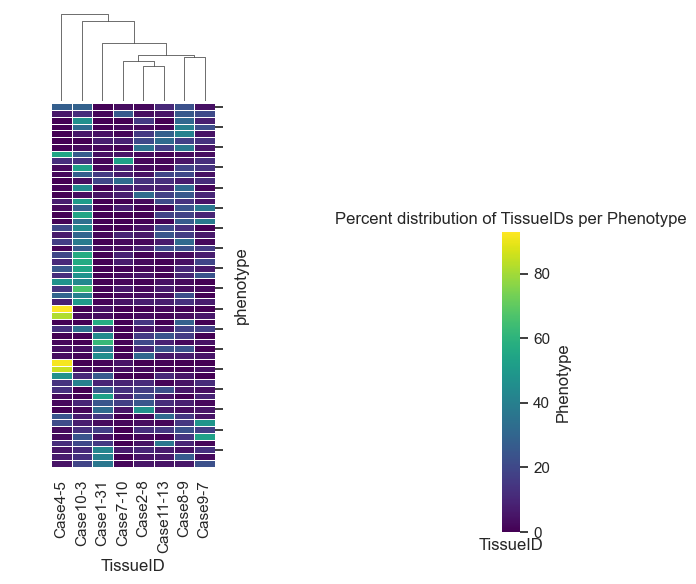

In [196]:

# Contingency table (counts)
counts = pd.crosstab(
    adata_balanced.obs['phenotype'].astype('category'),
    adata_balanced.obs['TissueID']
)

# Convert counts to percentages per phenotype (rows)
percent_per_phenotype= counts.divide(counts.sum(axis=1), axis=0) * 100
percent_per_phenotype_ordered = percent_per_phenotype.reindex(phenotype_order)

# Plot heatmap
plt.figure(figsize=(6, 12))
g= sns.clustermap(
    percent_per_phenotype,
    cmap='viridis',
    annot=False,
    fmt=".1f",
    linewidths=0.5,
    dendrogram_ratio=0.2, 
    colors_ratio=0.5, 
    figsize=(6, 6),
    cbar_kws={'label': 'Percent per phenotype'},
    row_cluster=False,   # keep phenotype order
    col_cluster=True,
    cbar_pos=(0.85,0.1,0.03,0.5)      # cluster TissueID columns\
    
    
)
g.ax_heatmap.set_yticklabels([])

plt.ylabel('Phenotype')
plt.xlabel('TissueID')
plt.title('Percent distribution of TissueIDs per Phenotype')
plt.tight_layout()
plt.show()

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_5847/1669986369.py:34: UserWarning:

Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations



<Figure size 600x1200 with 0 Axes>

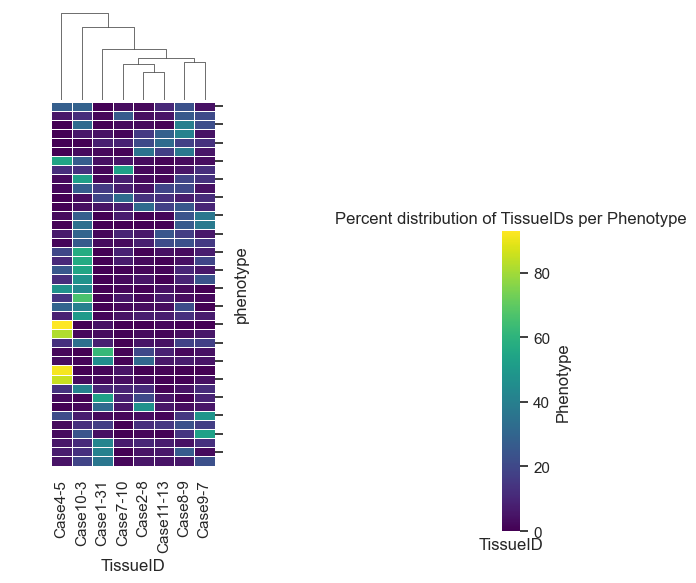

In [250]:

# Contingency table (counts)
counts = pd.crosstab(
    adata_balanced_subset.obs['phenotype'].astype('category'),
    adata_balanced_subset.obs['TissueID']
)

# Convert counts to percentages per phenotype (rows)
percent_per_phenotype= counts.divide(counts.sum(axis=1), axis=0) * 100
percent_per_phenotype_ordered = percent_per_phenotype.reindex(phenotype_order)

# Plot heatmap
plt.figure(figsize=(6, 12))
g= sns.clustermap(
    percent_per_phenotype,
    cmap='viridis',
    annot=False,
    fmt=".1f",
    linewidths=0.5,
    dendrogram_ratio=0.2, 
    colors_ratio=0.5, 
    figsize=(6, 6),
    cbar_kws={'label': 'Percent per phenotype'},
    row_cluster=False,   # keep phenotype order
    col_cluster=True,
    cbar_pos=(0.85,0.1,0.03,0.5)      # cluster TissueID columns\
    
    
)
g.ax_heatmap.set_yticklabels([])

plt.ylabel('Phenotype')
plt.xlabel('TissueID')
plt.title('Percent distribution of TissueIDs per Phenotype')
plt.tight_layout()
plt.show()

In [206]:
adata_balanced.obs['cluster_d4.1'].unique()

[4, 3, 1, 2, 5, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6]

<Figure size 1200x800 with 0 Axes>

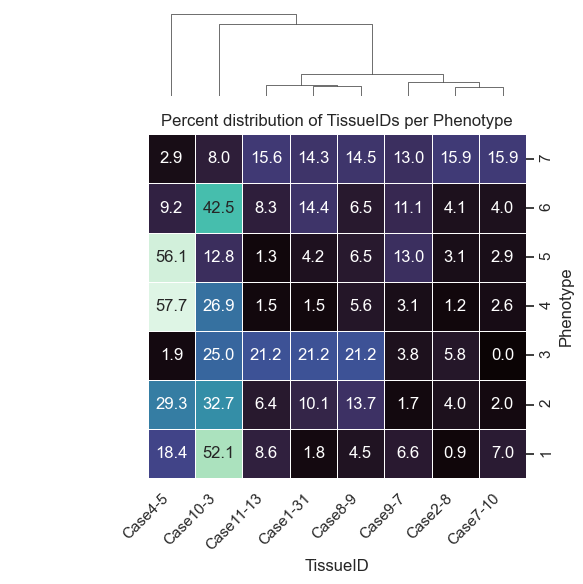

In [ ]:

# Contingency table (counts)
counts = pd.crosstab(
    adata_balanced.obs['cluster_d4.1'].astype('category'),
    adata_balanced.obs['TissueID']
)

# Convert counts to percentages per phenotype (rows)
percent_per_cluster = counts.divide(counts.sum(axis=1), axis=0) * 100
percent_per_cluster = percent_per_cluster.iloc[::-1]
# Plot heatmap
plt.figure(figsize=(12, 8))
g= sns.clustermap(
    percent_per_cluster,
    cmap='mako',
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    dendrogram_ratio=0.2, 
    colors_ratio=0.5, 
    figsize=(6, 6),
    cbar_kws={'label': 'Percent per phenotype'},
    row_cluster=False,   # keep phenotype order
    col_cluster=True,
    cbar_pos=None     # cluster TissueID columns\
)
    
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right')

plt.ylabel('Phenotype')
plt.xlabel('TissueID')
plt.title('Percent distribution of TissueIDs per Phenotype')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

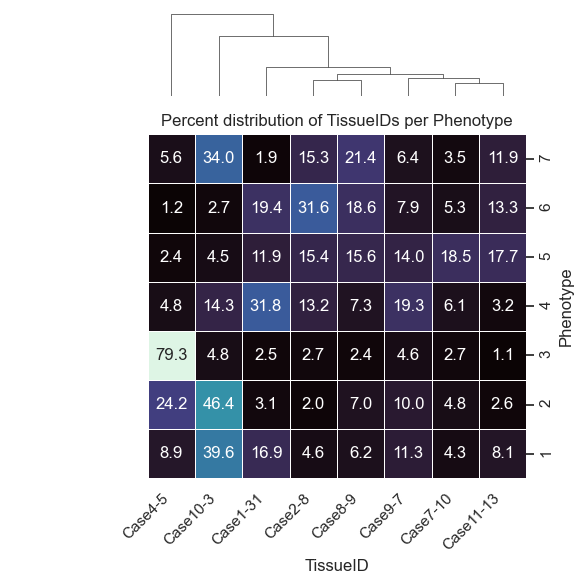

In [251]:

# Contingency table (counts)
counts = pd.crosstab(
    adata_balanced_subset.obs['cluster_d3.8'].astype('category'),
    adata_balanced_subset.obs['TissueID']
)

# Convert counts to percentages per phenotype (rows)
percent_per_cluster = counts.divide(counts.sum(axis=1), axis=0) * 100
percent_per_cluster = percent_per_cluster.iloc[::-1]
# Plot heatmap
plt.figure(figsize=(12, 8))
g= sns.clustermap(
    percent_per_cluster,
    cmap='mako',
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    dendrogram_ratio=0.2, 
    colors_ratio=0.5, 
    figsize=(6, 6),
    cbar_kws={'label': 'Percent per phenotype'},
    row_cluster=False,   # keep phenotype order
    col_cluster=True,
    cbar_pos=None     # cluster TissueID columns\
)
    
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), rotation=45, ha='right')

plt.ylabel('Phenotype')
plt.xlabel('TissueID')
plt.title('Percent distribution of TissueIDs per Phenotype')
plt.tight_layout()
plt.show()

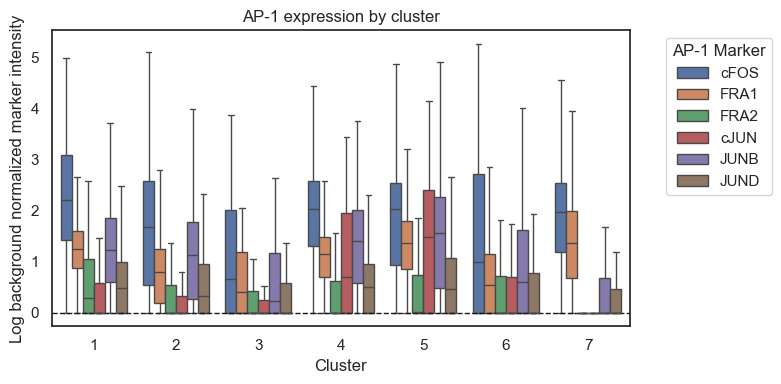

In [254]:

AP1s = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']
cases = sorted(adata_balanced.obs['TissueID'].dropna().unique())
clusters = sorted(adata_balanced.obs['cluster_d4.1'].dropna().unique())

# Prepare a DataFrame for plotting
plot_data = []
for case in cases:
    case_cells = adata_balanced.obs['TissueID'] == case
    adata_case = adata_balanced[case_cells, :]
    for cluster in clusters:
        cluster_cells = adata_case.obs['cluster_d4.1'] == cluster
        adata_case_cluster = adata_case[cluster_cells, :]
        for marker in AP1s:
            values = adata_case_cluster.layers['log_background_normalized_zeroed'][:, adata_case_cluster.var_names.get_loc(marker)]
            plot_data.append(pd.DataFrame({
                'AP1': marker,
                'log_background_normalized': values.flatten(),
                'Cluster': cluster,
                'Case': case
            }))
plot_df = pd.concat(plot_data, ignore_index=True)

plt.figure(figsize=(8, 4))
sns.boxplot(
    data=plot_df,
    x='Cluster',
    y='log_background_normalized',
    hue='AP1',
    dodge=True,
    showfliers=False  # Hide outliers for clarity
)
plt.xlabel('Cluster')
plt.ylabel('Log background normalized marker intensity')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('AP-1 expression by cluster')
plt.legend(title='AP-1 Marker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [234]:
adata_subset.obs['cluster_d4.1'].value_counts()

cluster_d4.1
7    699248
5     75431
6     41435
2     10607
1      4133
4      2930
Name: count, dtype: int64

In [239]:
adata_balanced_subset = hm.threshold_phenotype_by_prevalence(adata_balanced, threshold=0.001, verbose=True, return_adata=True)

                                      count
phenotype                                  
MITF+ SOX10+ PRAME+ NGFR- SOX9+ AXL-  23377
MITF+ SOX10+ PRAME+ NGFR+ SOX9+ AXL-  13683
MITF+ SOX10+ PRAME- NGFR- SOX9+ AXL-   6764
MITF- SOX10+ PRAME- NGFR+ SOX9+ AXL-   5477
MITF- SOX10+ PRAME- NGFR- SOX9+ AXL-   5424
MITF+ SOX10+ PRAME- NGFR+ SOX9+ AXL-   3840
MITF+ SOX10- PRAME- NGFR- SOX9+ AXL-   3429
MITF- SOX10+ PRAME+ NGFR- SOX9+ AXL-   3348
MITF- SOX10+ PRAME+ NGFR+ SOX9+ AXL-   3152
MITF- SOX10+ PRAME- NGFR- SOX9- AXL-   3013
MITF+ SOX10- PRAME- NGFR- SOX9- AXL-   3011
MITF- SOX10- PRAME+ NGFR- SOX9- AXL-   2804
MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL-   2245
MITF+ SOX10+ PRAME- NGFR- SOX9- AXL-   1367
MITF+ SOX10- PRAME- NGFR+ SOX9- AXL-   1253
MITF+ SOX10+ PRAME+ NGFR- SOX9- AXL-   1224
MITF+ SOX10- PRAME- NGFR+ SOX9+ AXL+    808
MITF+ SOX10- PRAME- NGFR- SOX9+ AXL+    795
MITF- SOX10+ PRAME+ NGFR- SOX9- AXL-    785
MITF- SOX10- PRAME+ NGFR- SOX9+ AXL-    731
MITF+ SOX10- PRAME+ NGFR+ SOX9+ 

/Volumes/FallahiLab/Maize-Data/People/Kim_Nguyen/AP-1_HetMel_analysis/Scripts/hetmel.py:1619: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



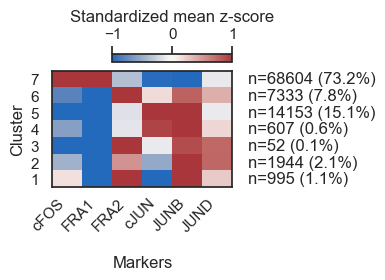

In [257]:
subsetMarkers = ['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND']

Case_subset = adata_balanced
hm.heatmapnew(Case_subset, groupBy='cluster_d4.1', layer = 'zscore', 
          
            standardScale='column', subsetMarkers=subsetMarkers, 
            figsize=(4,2), showPrevalence=True, 
            x_tick_rotation=45,
            orderColumn=['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND'],
            orderRow= [7,6,5,4,3,2,1], 
            clusterRows= False, clusterColumns=False,
            scale_title ='Standardized mean z-score', y_lab='Cluster',
            phenotype_labels=['cFOS', 'FRA1', 'FRA2', 'cJUN', 'JUNB', 'JUND'],
            vmin=-1, vmax=1,
            #saveDir=savedir,
            
            #fileName='Case2-7_ap1state_heatmap_cross.png'
             )

/var/folders/vb/f8_hhkls73qf5938jf5w6rk9dds1_2/T/ipykernel_5847/3232929538.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




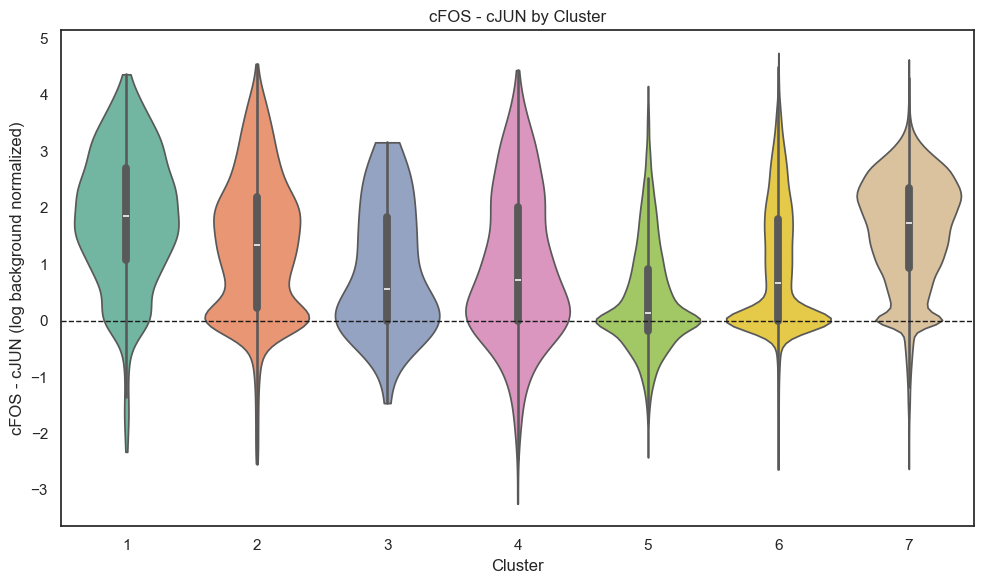

In [259]:
# Prepare a DataFrame for plotting cFOS - cJUN (log background normalized difference)
plot_data = []
for case in cases:
    case_cells = adata_balanced.obs['TissueID'] == case
    adata_case =adata_balanced[case_cells, :]
    for cluster in clusters:
        cluster_cells = adata_case.obs['cluster_d4.1'] == cluster
        adata_case_cluster = adata_case[cluster_cells, :]
        # Get cFOS and cJUN values
        cFOS_vals = adata_case_cluster.layers['log_background_normalized_zeroed'][:, adata_case_cluster.var_names.get_loc('cFOS')]
        cJUN_vals = adata_case_cluster.layers['log_background_normalized_zeroed'][:, adata_case_cluster.var_names.get_loc('cJUN')]
        # Subtract cJUN from cFOS
        diff = cFOS_vals - cJUN_vals
        plot_data.append(pd.DataFrame({
            'cFOS_minus_cJUN': diff.flatten(),
            'Cluster': cluster,
            'Case': case
        }))
plot_df_diff = pd.concat(plot_data, ignore_index=True)

# Plot: x=Cluster, y=cFOS - cJUN
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=plot_df_diff,
    x='Cluster',
    y='cFOS_minus_cJUN',
    inner='box',
    cut=0,
    palette='Set2'
)
plt.xlabel('Cluster')
plt.ylabel('cFOS - cJUN (log background normalized)')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.title('cFOS - cJUN by Cluster')
plt.tight_layout()
plt.show()